In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print(datetime.datetime.now())

2023-06-10 09:19:33.046864


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(3654.3271)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8112)tensor(7.5843)tensor(3.9415)tensor(4.3496)tensor(4.1649)tensor(3.6831)tensor(3.1162)tensor(3.6065)tensor(5.5494)tensor(4.7880)tensor(3.0343)tensor(5.1485)tensor(5.6437)tensor(3.0327)tensor(2.6273)tensor(5.4727)tensor(4.7523)tensor(5.2229)tensor(3.5694)tensor(3.4968)tensor(3.3691)tensor(5.9452)tensor(3.2055)tensor(5.2405)tensor(4.4519)tensor(4.6398)tensor(4.1415)tensor(3.0690)tensor(4.9168)tensor(2.9485)tensor(3.1145)tensor(2.5223)tensor(4.9607)tensor(6.8886)tensor(5.2459)tensor(5.9765)tensor(4.2583)tensor(6.5078)tensor(7.0713)tensor(4.3257)tensor(6.9529)tensor(4.4701)tensor(4.0355)tensor(2.6688)tensor(6.3710)tensor(6.2093)tensor(3.5797)tensor(5.1569)tensor(3.3284)tensor(4.0263)tensor(5.7144)tensor(4.3369)tensor(3.2438)tensor(2.9789)tensor(5.9581)tensor(5.4813)tensor(3.2171)tensor(3.9821)tensor(6.2295)tensor(3.8828)tensor(4.1558)tensor(5.6005)tensor(3.2059)tensor(4.1194)tensor(3.5799)tensor(4.9303)tensor(3.3586)tensor(3.8694)tensor(6.2359)tensor(5.0518)tensor(4.1599)tensor

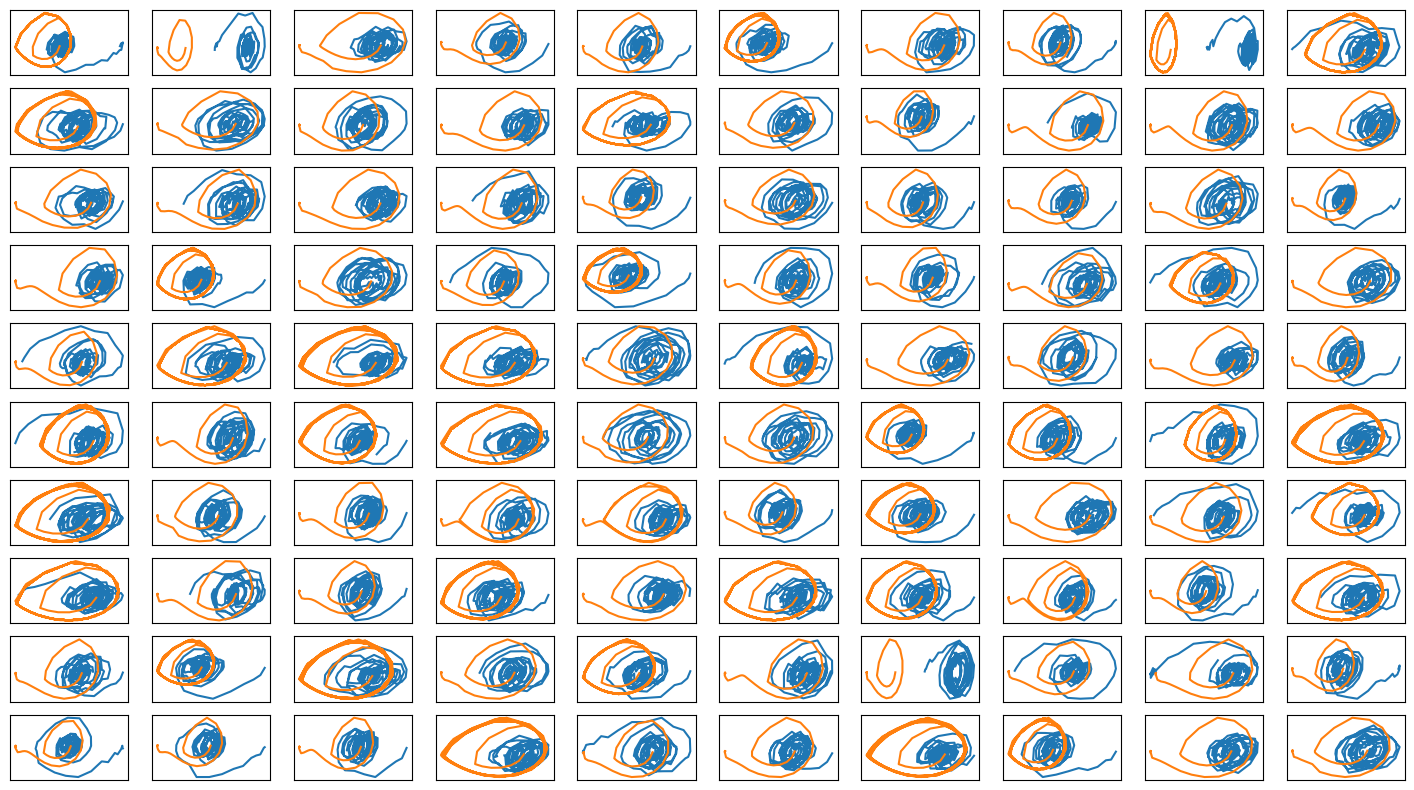

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 500.57074  validloss 520.65485±0.00000  bestvalidloss 520.65485  last_update 0
train: iter 1  trainloss 379.47961  validloss 227.30738±0.00000  bestvalidloss 227.30738  last_update 0
train: iter 2  trainloss 223.50751  validloss 9881.66409±0.00000  bestvalidloss 227.30738  last_update 1
train: iter 3  trainloss 217.00364  validloss 442.12053±0.00000  bestvalidloss 227.30738  last_update 2
train: iter 4  trainloss 136.16824  validloss 228.92250±0.00000  bestvalidloss 227.30738  last_update 3
train: iter 5  trainloss 125.24557  validloss 170.29309±0.00000  bestvalidloss 170.29309  last_update 0
train: iter 6  trainloss 224.58137  validloss 805.74643±0.00000  bestvalidloss 170.29309  last_update 1
train: iter 7  trainloss 147.53989  validloss 239.87338±0.00000  bestvalidloss 170.29309  last_update 2
train: iter 8  trainloss 108.67693  validloss 261.22619±0.00000  bestvalidloss 170.29309  last_update 3
train: iter 9  trainloss 85.11862  validloss

train: iter 79  trainloss -620.34288  validloss -527.37082±0.00000  bestvalidloss -543.54940  last_update 1
train: iter 80  trainloss -631.16832  validloss -472.61101±0.00000  bestvalidloss -543.54940  last_update 2
train: iter 81  trainloss -636.25147  validloss -512.26190±0.00000  bestvalidloss -543.54940  last_update 3
train: iter 82  trainloss -648.25466  validloss -541.82860±0.00000  bestvalidloss -543.54940  last_update 4
train: iter 83  trainloss -640.48333  validloss -542.15783±0.00000  bestvalidloss -543.54940  last_update 5
train: iter 84  trainloss -662.38557  validloss -534.15758±0.00000  bestvalidloss -543.54940  last_update 6
train: iter 85  trainloss -661.31823  validloss -566.37389±0.00000  bestvalidloss -566.37389  last_update 0
train: iter 86  trainloss -659.64558  validloss -520.30401±0.00000  bestvalidloss -566.37389  last_update 1
train: iter 87  trainloss -660.10838  validloss -570.15490±0.00000  bestvalidloss -570.15490  last_update 0
train: iter 88  trainloss -6

train: iter 155  trainloss -806.98651  validloss -671.38803±0.00000  bestvalidloss -709.18920  last_update 2
train: iter 156  trainloss -793.81185  validloss -732.45743±0.00000  bestvalidloss -732.45743  last_update 0
train: iter 157  trainloss -789.28233  validloss -689.66845±0.00000  bestvalidloss -732.45743  last_update 1
train: iter 158  trainloss -821.88388  validloss -723.55765±0.00000  bestvalidloss -732.45743  last_update 2
train: iter 159  trainloss -809.17442  validloss -727.54562±0.00000  bestvalidloss -732.45743  last_update 3
train: iter 160  trainloss -817.77611  validloss -728.33829±0.00000  bestvalidloss -732.45743  last_update 4
train: iter 161  trainloss -800.43208  validloss -704.51954±0.00000  bestvalidloss -732.45743  last_update 5
train: iter 162  trainloss -782.17761  validloss -704.33701±0.00000  bestvalidloss -732.45743  last_update 6
train: iter 163  trainloss -819.60553  validloss -731.98983±0.00000  bestvalidloss -732.45743  last_update 7
train: iter 164  tr

train: iter 231  trainloss -866.84208  validloss -733.94301±0.00000  bestvalidloss -770.50179  last_update 4
train: iter 232  trainloss -859.80204  validloss -657.96348±0.00000  bestvalidloss -770.50179  last_update 5
train: iter 233  trainloss -855.36226  validloss -760.41842±0.00000  bestvalidloss -770.50179  last_update 6
train: iter 234  trainloss -862.80511  validloss -761.64832±0.00000  bestvalidloss -770.50179  last_update 7
train: iter 235  trainloss -863.76919  validloss -755.79902±0.00000  bestvalidloss -770.50179  last_update 8
train: iter 236  trainloss -867.30404  validloss -734.97048±0.00000  bestvalidloss -770.50179  last_update 9
train: iter 237  trainloss -858.20270  validloss -750.80066±0.00000  bestvalidloss -770.50179  last_update 10
train: iter 238  trainloss -857.04895  validloss -772.33967±0.00000  bestvalidloss -772.33967  last_update 0
train: iter 239  trainloss -849.56948  validloss -761.44663±0.00000  bestvalidloss -772.33967  last_update 1
train: iter 240  t

train: iter 307  trainloss -884.36487  validloss -779.38030±0.00000  bestvalidloss -798.11570  last_update 4
train: iter 308  trainloss -872.28259  validloss -786.22213±0.00000  bestvalidloss -798.11570  last_update 5
train: iter 309  trainloss -879.60989  validloss -727.25217±0.00000  bestvalidloss -798.11570  last_update 6
train: iter 310  trainloss -871.37239  validloss -787.50882±0.00000  bestvalidloss -798.11570  last_update 7
train: iter 311  trainloss -882.36614  validloss -765.10937±0.00000  bestvalidloss -798.11570  last_update 8
train: iter 312  trainloss -839.13307  validloss -612.81881±0.00000  bestvalidloss -798.11570  last_update 9
train: iter 313  trainloss -874.46737  validloss -713.15157±0.00000  bestvalidloss -798.11570  last_update 10
train: iter 314  trainloss -867.17053  validloss -797.22679±0.00000  bestvalidloss -798.11570  last_update 11
train: iter 315  trainloss -886.92590  validloss -773.83424±0.00000  bestvalidloss -798.11570  last_update 12
train: iter 316 

train: iter 382  trainloss -870.38432  validloss -765.86248±0.00000  bestvalidloss -806.33484  last_update 1
train: iter 383  trainloss -867.11865  validloss -755.97201±0.00000  bestvalidloss -806.33484  last_update 2
train: iter 384  trainloss -876.22822  validloss -788.97633±0.00000  bestvalidloss -806.33484  last_update 3
train: iter 385  trainloss -898.13396  validloss -765.60951±0.00000  bestvalidloss -806.33484  last_update 4
train: iter 386  trainloss -847.20164  validloss -804.55490±0.00000  bestvalidloss -806.33484  last_update 5
train: iter 387  trainloss -892.65337  validloss -799.18759±0.00000  bestvalidloss -806.33484  last_update 6
train: iter 388  trainloss -867.46442  validloss -805.55601±0.00000  bestvalidloss -806.33484  last_update 7
train: iter 389  trainloss -886.27931  validloss -791.80494±0.00000  bestvalidloss -806.33484  last_update 8
train: iter 390  trainloss -866.15847  validloss -776.40676±0.00000  bestvalidloss -806.33484  last_update 9
train: iter 391  tr

train: iter 457  trainloss -889.49327  validloss -793.67943±0.00000  bestvalidloss -811.90335  last_update 4
train: iter 458  trainloss -888.39394  validloss -765.75394±0.00000  bestvalidloss -811.90335  last_update 5
train: iter 459  trainloss -862.18959  validloss -765.99107±0.00000  bestvalidloss -811.90335  last_update 6
train: iter 460  trainloss -885.63247  validloss -724.43940±0.00000  bestvalidloss -811.90335  last_update 7
train: iter 461  trainloss -884.27483  validloss -800.75231±0.00000  bestvalidloss -811.90335  last_update 8
train: iter 462  trainloss -886.11294  validloss -795.55225±0.00000  bestvalidloss -811.90335  last_update 9
train: iter 463  trainloss -878.52010  validloss -740.06012±0.00000  bestvalidloss -811.90335  last_update 10
train: iter 464  trainloss -896.25475  validloss -786.42871±0.00000  bestvalidloss -811.90335  last_update 11
train: iter 465  trainloss -899.91392  validloss -799.27004±0.00000  bestvalidloss -811.90335  last_update 12
train: iter 466 

train: iter 532  trainloss -878.76306  validloss -789.06505±0.00000  bestvalidloss -815.65536  last_update 23
train: iter 533  trainloss -874.86269  validloss -669.91331±0.00000  bestvalidloss -815.65536  last_update 24
train: iter 534  trainloss -883.59803  validloss -678.59323±0.00000  bestvalidloss -815.65536  last_update 25
train: iter 535  trainloss -891.90114  validloss -801.76671±0.00000  bestvalidloss -815.65536  last_update 26
train: iter 536  trainloss -895.73940  validloss -797.54147±0.00000  bestvalidloss -815.65536  last_update 27
train: iter 537  trainloss -902.47772  validloss -808.78823±0.00000  bestvalidloss -815.65536  last_update 28
train: iter 538  trainloss -894.78273  validloss -793.30128±0.00000  bestvalidloss -815.65536  last_update 29
train: iter 539  trainloss -893.38287  validloss -672.98300±0.00000  bestvalidloss -815.65536  last_update 30
train: iter 540  trainloss -899.06770  validloss -805.91631±0.00000  bestvalidloss -815.65536  last_update 31
train: ite

train: iter 608  trainloss -899.27217  validloss -792.42957±0.00000  bestvalidloss -823.64151  last_update 27
train: iter 609  trainloss -910.04870  validloss -778.91811±0.00000  bestvalidloss -823.64151  last_update 28
train: iter 610  trainloss -866.13336  validloss -815.62794±0.00000  bestvalidloss -823.64151  last_update 29
train: iter 611  trainloss -893.49450  validloss -804.94652±0.00000  bestvalidloss -823.64151  last_update 30
train: iter 612  trainloss -909.35089  validloss -814.24718±0.00000  bestvalidloss -823.64151  last_update 31
train: iter 613  trainloss -897.90525  validloss -799.76776±0.00000  bestvalidloss -823.64151  last_update 32
train: iter 614  trainloss -883.80048  validloss -813.19581±0.00000  bestvalidloss -823.64151  last_update 33
train: iter 615  trainloss -895.73991  validloss -773.24334±0.00000  bestvalidloss -823.64151  last_update 34
train: iter 616  trainloss -915.50298  validloss -799.73898±0.00000  bestvalidloss -823.64151  last_update 35
train: ite

train: iter 684  trainloss -864.57532  validloss -634.90369±0.00000  bestvalidloss -826.35596  last_update 9
train: iter 685  trainloss -889.51966  validloss -750.68128±0.00000  bestvalidloss -826.35596  last_update 10
train: iter 686  trainloss -900.37346  validloss -818.08067±0.00000  bestvalidloss -826.35596  last_update 11
train: iter 687  trainloss -887.79241  validloss -793.20733±0.00000  bestvalidloss -826.35596  last_update 12
train: iter 688  trainloss -914.27800  validloss -781.91763±0.00000  bestvalidloss -826.35596  last_update 13
train: iter 689  trainloss -889.16975  validloss -748.15829±0.00000  bestvalidloss -826.35596  last_update 14
train: iter 690  trainloss -911.77074  validloss -807.36579±0.00000  bestvalidloss -826.35596  last_update 15
train: iter 691  trainloss -910.37545  validloss -821.99486±0.00000  bestvalidloss -826.35596  last_update 16
train: iter 692  trainloss -893.63227  validloss -813.12756±0.00000  bestvalidloss -826.35596  last_update 17
train: iter

train: iter 759  trainloss -904.05267  validloss -820.47895±0.00000  bestvalidloss -826.35596  last_update 84
train: iter 760  trainloss -905.13628  validloss -816.28694±0.00000  bestvalidloss -826.35596  last_update 85
train: iter 761  trainloss -901.94135  validloss -805.32690±0.00000  bestvalidloss -826.35596  last_update 86
train: iter 762  trainloss -919.23960  validloss -810.84302±0.00000  bestvalidloss -826.35596  last_update 87
train: iter 763  trainloss -906.55304  validloss -769.24669±0.00000  bestvalidloss -826.35596  last_update 88
train: iter 764  trainloss -894.87630  validloss -818.59744±0.00000  bestvalidloss -826.35596  last_update 89
train: iter 765  trainloss -906.57739  validloss -758.72853±0.00000  bestvalidloss -826.35596  last_update 90
train: iter 766  trainloss -902.86574  validloss -816.91058±0.00000  bestvalidloss -826.35596  last_update 91
train: iter 767  trainloss -883.87370  validloss -810.34839±0.00000  bestvalidloss -826.35596  last_update 92
train: ite

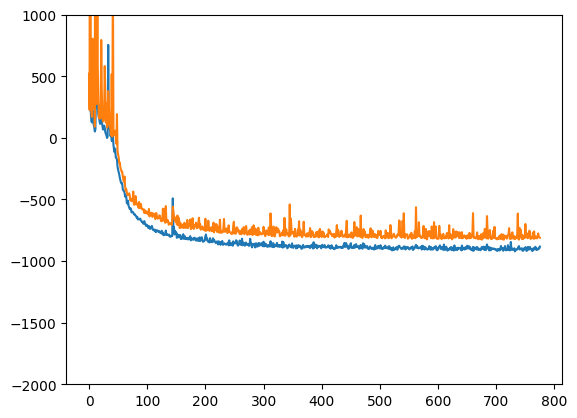

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  predict diverge [ 1.26796658 15.72516685] [0.61334783 9.61113717] [22.490467 15.168516] [11.245234  7.584258] sim_timestep 27
21  22  23  24  predict diverge [ 1.34460609 17.79604366] [ 0.65905868 11.2452695 ] [22.490467 15.168516] [11.245234  7.584258] sim_timestep 27
25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  predict diverge [ 1.9761077  15.94913802] [0.82381412 6.45376289] [22.490467 15.168516] [11.245234  7.584258] sim_timestep 153
63  64  65  66  67  68  69  70  71  72  predict diverge [ 2.32744002 16.90272605] [1.0004538  6.68625324] [22.490467 15.168516] [11.245234  7.584258] sim_timestep 47
73  74  75  76  77  78  79  80  predict diverge [ 3.80414879 16.86972839] [1.13040687 2.09697098] [22.490467 15.168516] [11.245234  7.584258] sim_timestep 28
81  82  83  84  85  86  87  88  89  90  91  predict d

実環境方策rollout vs Sim環境方策rollout


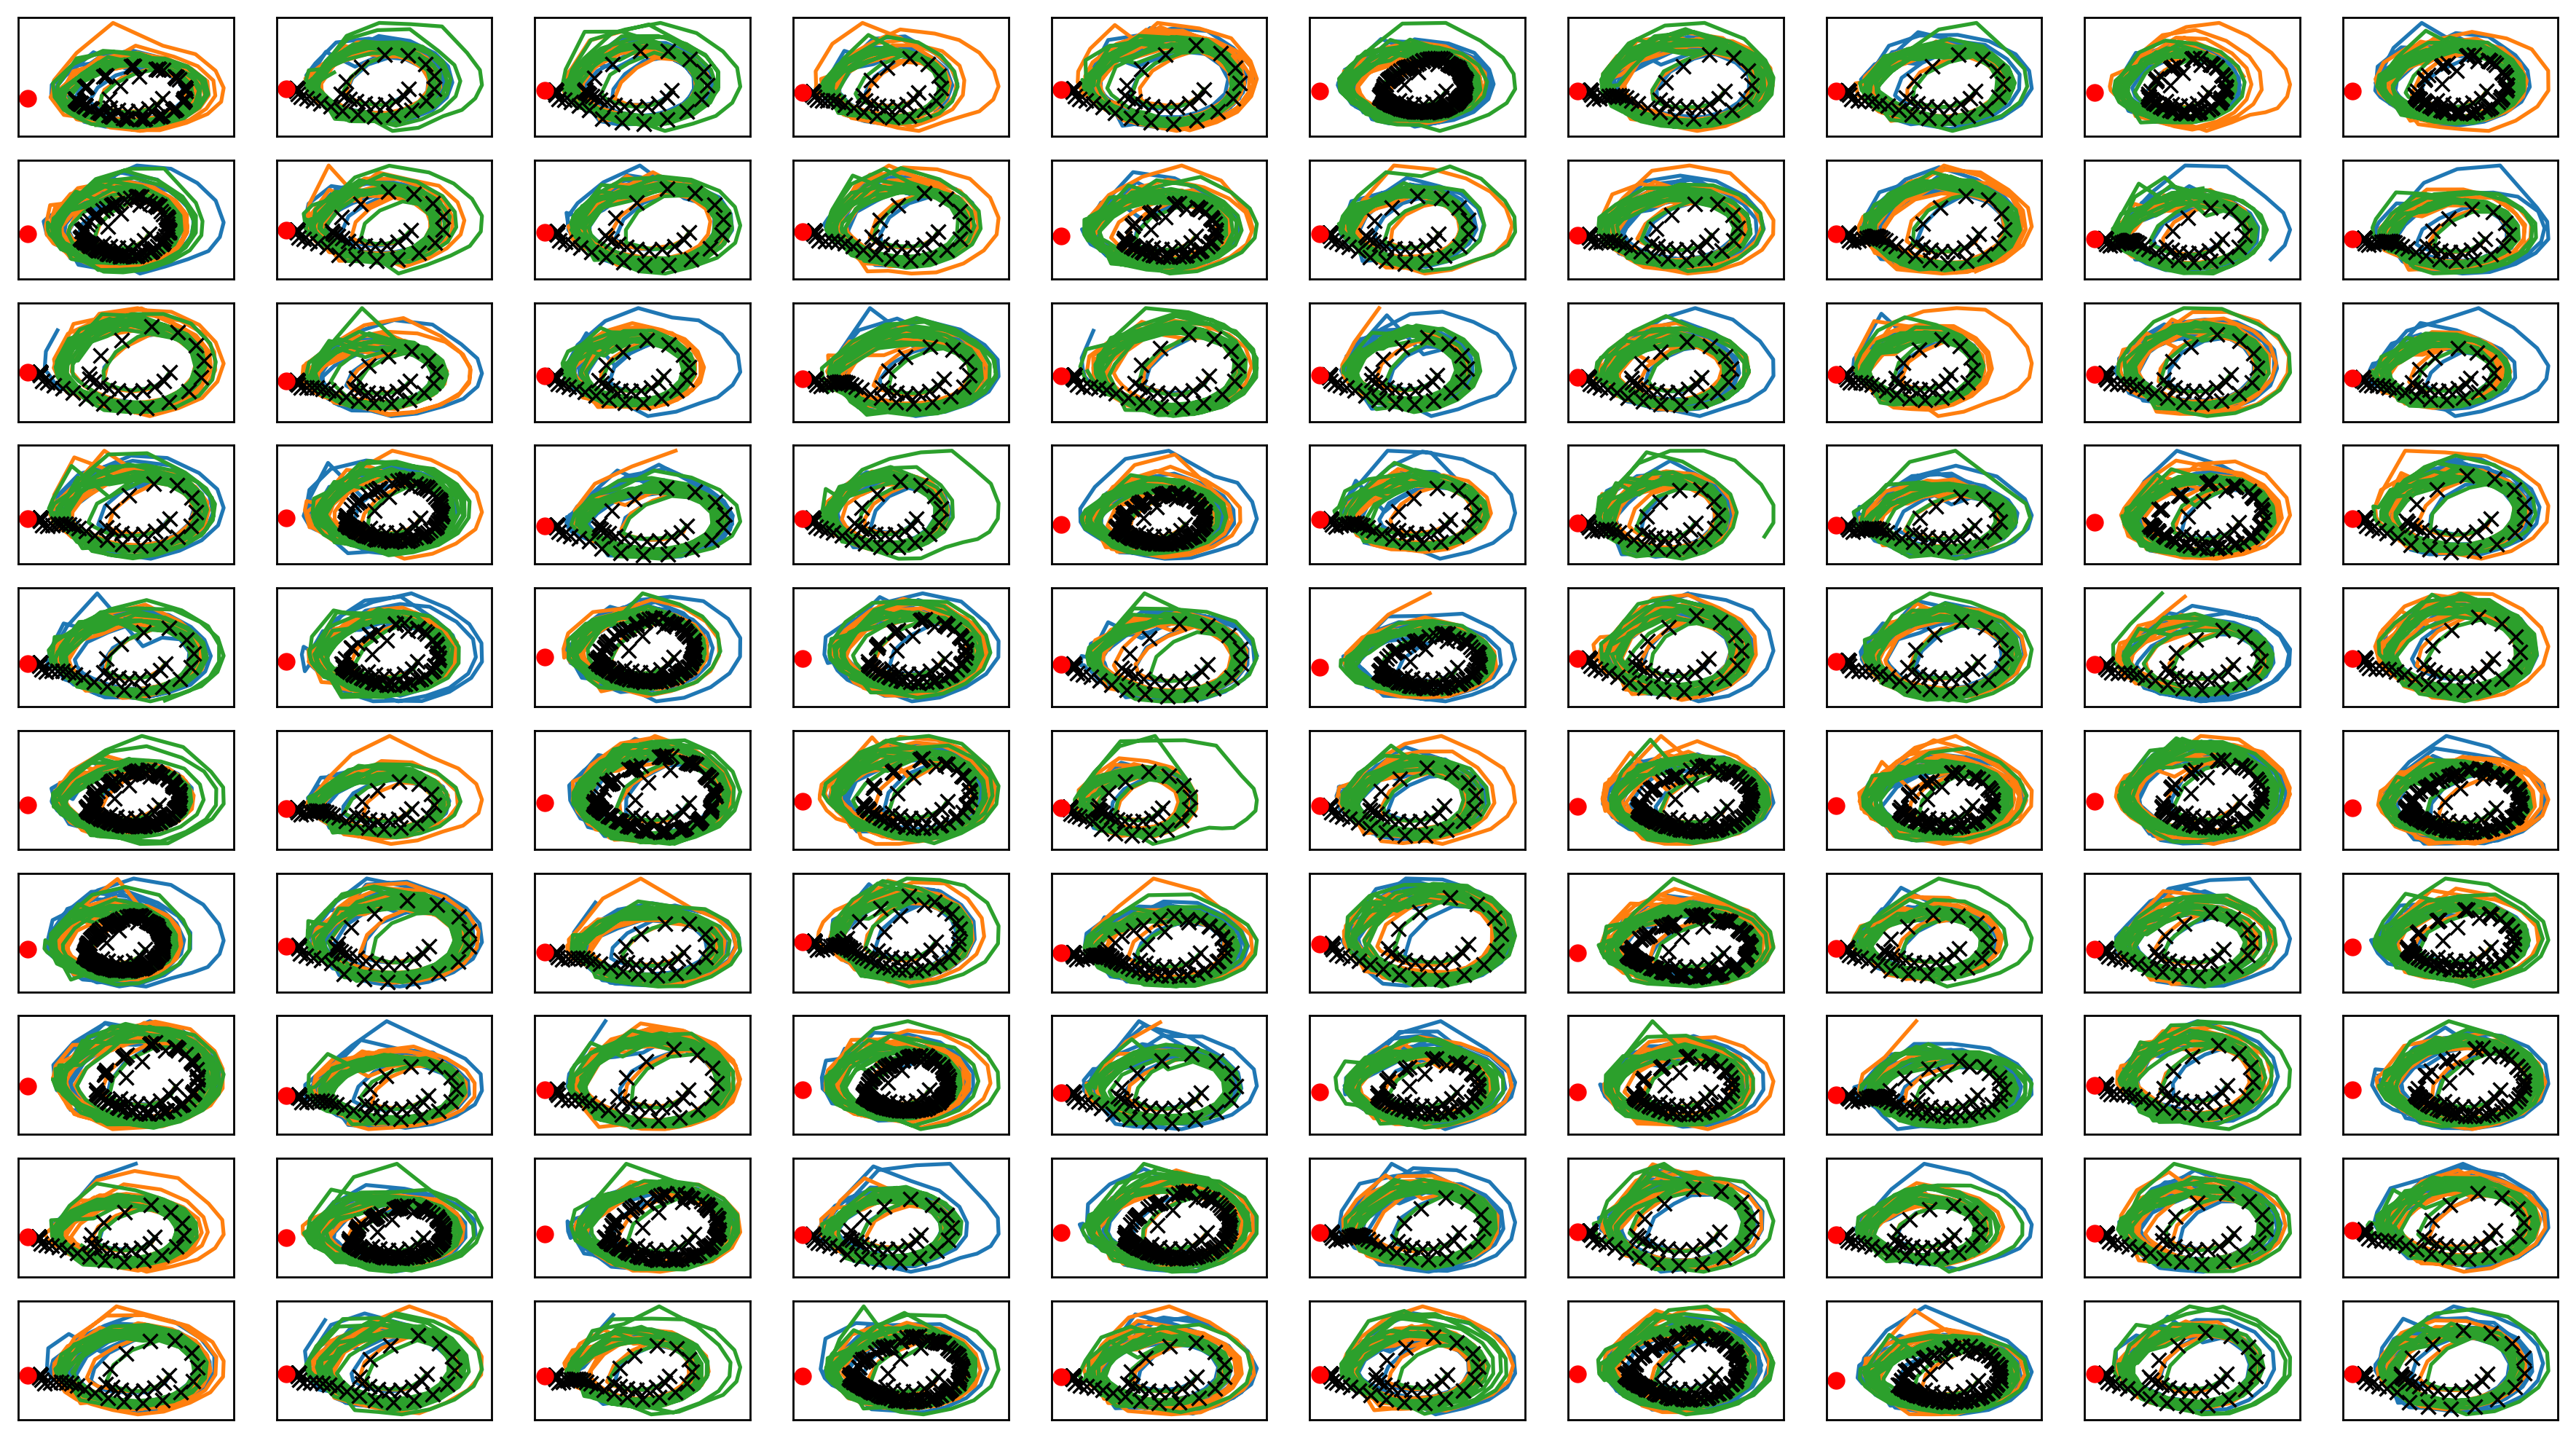

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

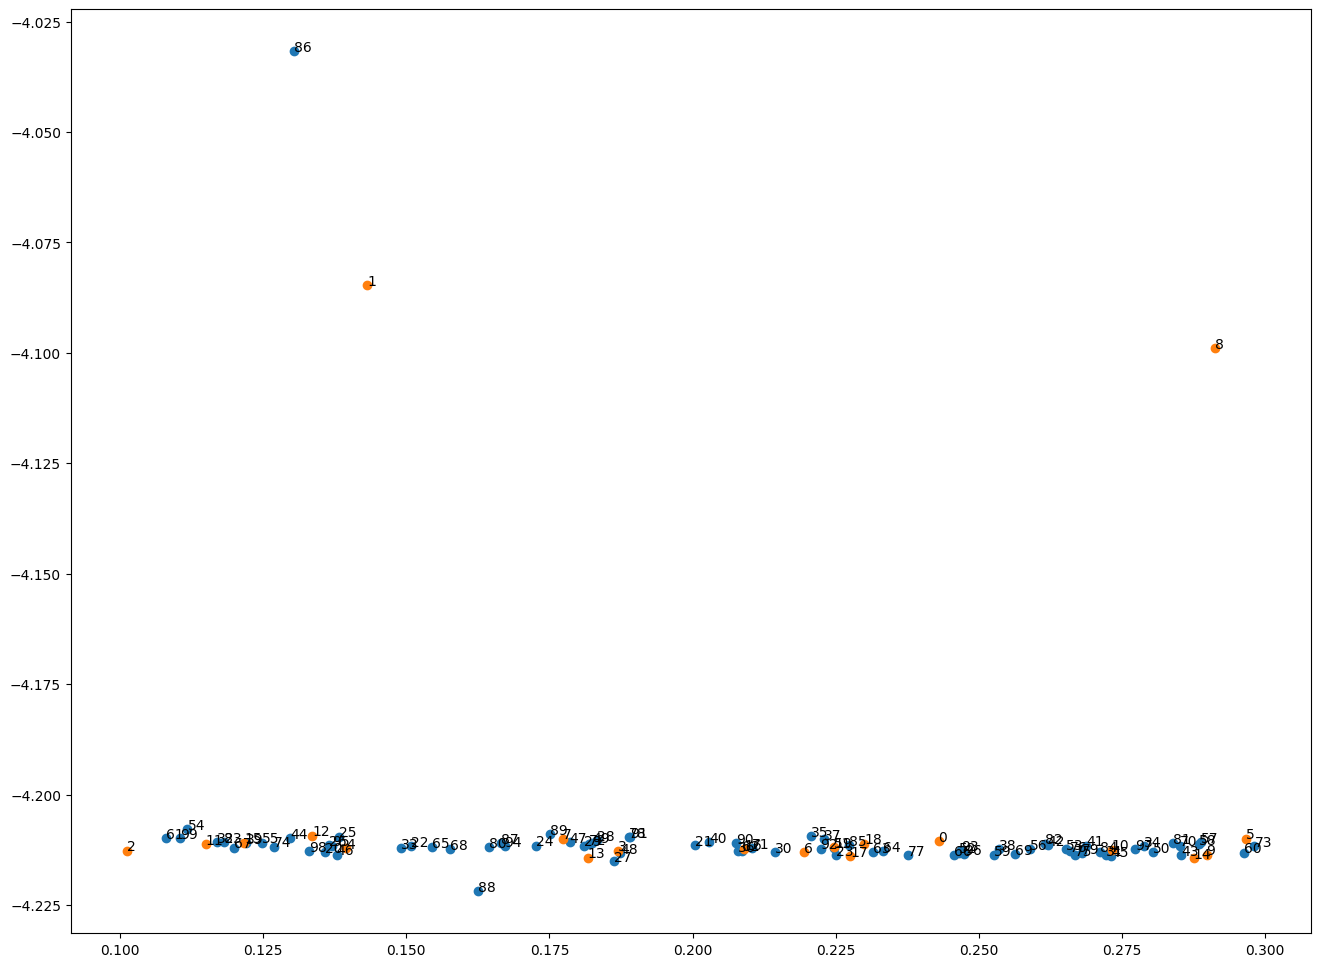

[0.2429632  0.1432179  0.10124605 0.18695831 0.13953701 0.29668014
 0.21946679 0.17731426 0.29133059 0.28979546 0.27325786 0.11498972
 0.13359444 0.18168877 0.28751432 0.12163868 0.20904053 0.22752205
 0.22996102 0.22478322 0.13579478 0.20050661 0.15073593 0.22498617
 0.17257072 0.13828928 0.13648908 0.18636441 0.18335526 0.18096504
 0.21442775 0.27220286 0.11693232 0.14909074 0.27893026 0.2207127
 0.20801495 0.22291257 0.25355161 0.12196362 0.20293074 0.2687414
 0.26202888 0.28534414 0.12974537 0.27315498 0.13780515 0.17855623
 0.18735326 0.18249444 0.28048437 0.22471377 0.24659974 0.26520457
 0.11177602 0.12480292 0.25888466 0.2887595  0.28851717 0.25259873
 0.29624198 0.10801822 0.20865806 0.23149693 0.23331168 0.15449429
 0.24565389 0.11986555 0.15760737 0.25630622 0.28516172 0.21038529
 0.18191828 0.29815936 0.12695052 0.26675627 0.26588359 0.23764425
 0.18890813 0.26809321 0.164515   0.28399747 0.26150979 0.11818211
 0.27123675 0.22736973 0.13037712 0.16649903 0.16244101 0.175068

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


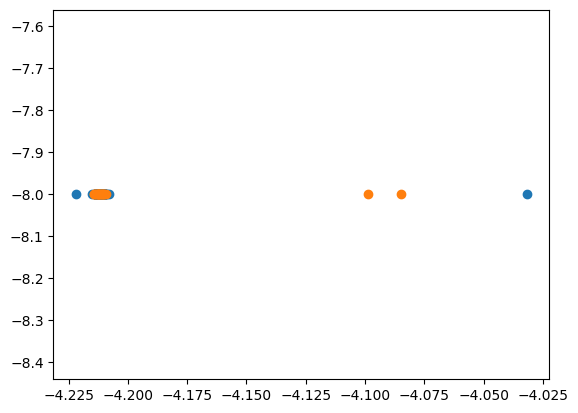

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 9.30163  validloss 9.72575±0.00000  bestvalidloss 9.72575  last_update 0
train: iter 1  trainloss 8.44207  validloss 8.82210±0.00000  bestvalidloss 8.82210  last_update 0
train: iter 2  trainloss 7.71724  validloss 8.01586±0.00000  bestvalidloss 8.01586  last_update 0
train: iter 3  trainloss 7.08147  validloss 7.34496±0.00000  bestvalidloss 7.34496  last_update 0
train: iter 4  trainloss 6.55541  validloss 6.76951±0.00000  bestvalidloss 6.76951  last_update 0
train: iter 5  trainloss 6.09059  validloss 6.29012±0.00000  bestvalidloss 6.29012  last_update 0
train: iter 6  trainloss 5.68483  validloss 5.84808±0.00000  bestvalidloss 5.84808  last_update 0
train: iter 7  trainloss 5.32200  validloss 5.47127±0.00000  bestvalidloss 5.47127  last_update 0
train: iter 8  trainloss 5.01959  validloss 5.13570±0.00000  bestvalidloss 5.13570  last_update 0
train: iter 9  trainloss 4.73880  validloss 4.86183±0.00000  bestvalidloss 4.86183  last_update 0
train: iter 10  trai

train: iter 89  trainloss 0.47965  validloss 0.50074±0.00000  bestvalidloss 0.50074  last_update 0
train: iter 90  trainloss 0.43836  validloss 0.46021±0.00000  bestvalidloss 0.46021  last_update 0
train: iter 91  trainloss 0.39693  validloss 0.41814±0.00000  bestvalidloss 0.41814  last_update 0
train: iter 92  trainloss 0.35602  validloss 0.37865±0.00000  bestvalidloss 0.37865  last_update 0
train: iter 93  trainloss 0.31513  validloss 0.33662±0.00000  bestvalidloss 0.33662  last_update 0
train: iter 94  trainloss 0.27395  validloss 0.29592±0.00000  bestvalidloss 0.29592  last_update 0
train: iter 95  trainloss 0.23337  validloss 0.25495±0.00000  bestvalidloss 0.25495  last_update 0
train: iter 96  trainloss 0.19253  validloss 0.21454±0.00000  bestvalidloss 0.21454  last_update 0
train: iter 97  trainloss 0.15166  validloss 0.17372±0.00000  bestvalidloss 0.17372  last_update 0
train: iter 98  trainloss 0.11139  validloss 0.13333±0.00000  bestvalidloss 0.13333  last_update 0
train: ite

train: iter 171  trainloss -2.05716  validloss -1.94881±0.00000  bestvalidloss -1.94881  last_update 0
train: iter 172  trainloss -2.03370  validloss -1.67155±0.00000  bestvalidloss -1.94881  last_update 1
train: iter 173  trainloss -2.07759  validloss -1.74816±0.00000  bestvalidloss -1.94881  last_update 2
train: iter 174  trainloss -2.07239  validloss -1.95184±0.00000  bestvalidloss -1.95184  last_update 0
train: iter 175  trainloss -2.10947  validloss -1.64354±0.00000  bestvalidloss -1.95184  last_update 1
train: iter 176  trainloss -2.12812  validloss -1.92869±0.00000  bestvalidloss -1.95184  last_update 2
train: iter 177  trainloss -2.11860  validloss -1.62626±0.00000  bestvalidloss -1.95184  last_update 3
train: iter 178  trainloss -1.98814  validloss -1.79926±0.00000  bestvalidloss -1.95184  last_update 4
train: iter 179  trainloss -2.11812  validloss -1.80822±0.00000  bestvalidloss -1.95184  last_update 5
train: iter 180  trainloss -2.09401  validloss -1.69734±0.00000  bestvali

train: iter 253  trainloss -2.15581  validloss -1.44258±0.00000  bestvalidloss -2.03855  last_update 49
train: iter 254  trainloss -2.25361  validloss -1.46824±0.00000  bestvalidloss -2.03855  last_update 50
train: iter 255  trainloss -2.26841  validloss -1.94808±0.00000  bestvalidloss -2.03855  last_update 51
train: iter 256  trainloss -2.09426  validloss -1.64609±0.00000  bestvalidloss -2.03855  last_update 52
train: iter 257  trainloss -2.15792  validloss -1.46689±0.00000  bestvalidloss -2.03855  last_update 53
train: iter 258  trainloss -2.18418  validloss -1.89423±0.00000  bestvalidloss -2.03855  last_update 54
train: iter 259  trainloss -2.21120  validloss -1.65726±0.00000  bestvalidloss -2.03855  last_update 55
train: iter 260  trainloss -2.19441  validloss -1.58813±0.00000  bestvalidloss -2.03855  last_update 56
train: iter 261  trainloss -2.17372  validloss -1.59182±0.00000  bestvalidloss -2.03855  last_update 57
train: iter 262  trainloss -2.13032  validloss -1.30332±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-4.2068, -6.8662], requires_grad=True)


In [ ]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 21.16377  validloss 23.07696±0.00000  bestvalidloss 23.07696  last_update 0
train: iter 1  trainloss 11.59616  validloss 15.51505±0.00000  bestvalidloss 15.51505  last_update 0
train: iter 2  trainloss 5.66207  validloss 8.06436±0.00000  bestvalidloss 8.06436  last_update 0
train: iter 3  trainloss 3.23502  validloss 5.55860±0.00000  bestvalidloss 5.55860  last_update 0
train: iter 4  trainloss 2.10382  validloss 4.51964±0.00000  bestvalidloss 4.51964  last_update 0
train: iter 5  trainloss 1.63586  validloss 4.25579±0.00000  bestvalidloss 4.25579  last_update 0
train: iter 6  trainloss 1.44337  validloss 4.25492±0.00000  bestvalidloss 4.25492  last_update 0
train: iter 7  trainloss 1.39273  validloss 4.25723±0.00000  bestvalidloss 4.25492  last_update 1
train: iter 8  trainloss 1.33657  validloss 4.27218±0.00000  bestvalidloss 4.25492  last_update 2
train: iter 9  trainloss 1.32217  validloss 4.40870±0.00000  bestvalidloss 4.25492  last_update 3
train: iter 10

train: iter 84  trainloss 0.87237  validloss 1.10065±0.00000  bestvalidloss 1.03944  last_update 8
train: iter 85  trainloss 0.89245  validloss 1.09589±0.00000  bestvalidloss 1.03944  last_update 9
train: iter 86  trainloss 0.88689  validloss 1.05700±0.00000  bestvalidloss 1.03944  last_update 10
train: iter 87  trainloss 0.87899  validloss 1.12530±0.00000  bestvalidloss 1.03944  last_update 11
train: iter 88  trainloss 0.87219  validloss 1.20024±0.00000  bestvalidloss 1.03944  last_update 12
train: iter 89  trainloss 0.88579  validloss 1.09689±0.00000  bestvalidloss 1.03944  last_update 13
train: iter 90  trainloss 0.87488  validloss 1.06329±0.00000  bestvalidloss 1.03944  last_update 14
train: iter 91  trainloss 0.88983  validloss 1.07528±0.00000  bestvalidloss 1.03944  last_update 15
train: iter 92  trainloss 0.88222  validloss 1.04218±0.00000  bestvalidloss 1.03944  last_update 16
train: iter 93  trainloss 0.88142  validloss 1.07162±0.00000  bestvalidloss 1.03944  last_update 17
tr

In [ ]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [ ]:
vi.save(ckpt_key="unweighted")

In [ ]:
print(vi.h_min_tilde)

In [ ]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

In [ ]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

In [ ]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

In [ ]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [ ]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))